In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

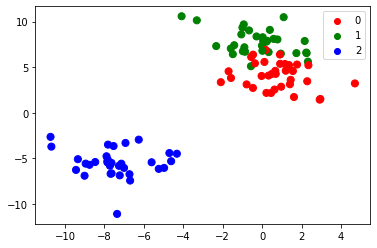

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, n_features=3, centers=3, random_state=3, cluster_std=1.5)
colors = np.array(['red', 'green', 'blue'])
plt.scatter(X[:, 0], X[:, 1], c=colors[y], s=50)

for label, c in enumerate(colors):
    plt.scatter([], [], c=c, label=str(label))
plt.legend()

In [3]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
# from sklearn.naive_bayes import MultinomialNB
# model = MultinomialNB()
model.fit(X, y)

GaussianNB()

In [4]:
print("Means:", model.theta_)
print("Standard deviations:", model.sigma_)

Means: [[ 0.74026624  4.08633696 -4.05378606]
 [-0.18331621  7.72234425  8.19954144]
 [-7.42390205 -5.51802714 -8.71164375]]
Standard deviations: [[1.88515997 2.09460034 2.704894  ]
 [2.171871   1.76027847 1.34886653]
 [2.42823162 2.37763325 2.34276036]]


In [20]:
def plot_ellipse(ax, mu, sigma, color="k", label=None):
    """
    Based on
    http://stackoverflow.com/questions/17952171/not-sure-how-to-fit-data-with-a-gaussian-python
    """
    from matplotlib.patches import Ellipse
    # Compute eigenvalues and associated eigenvectors
    vals, vecs = np.linalg.eigh(sigma)
    print(vecs[:, 0].shape)

    # Compute "tilt" of ellipse using first eigenvector
    x, y = vecs[:, 0]
    theta = np.degrees(np.arctan2(y, x))

    # Eigenvalues give length of ellipse along each eigenvector
    w, h = 2 * np.sqrt(vals)
    
    ax.tick_params(axis='both', which='major', labelsize=20)
    ellipse = Ellipse(mu, w, h, theta, color=color, label=label)  # color="k")
    ellipse.set_clip_box(ax.bbox)
    ellipse.set_alpha(0.2)
    ax.add_artist(ellipse)
    return ellipse
    # print(vecs)
    # return None

In [21]:
plt.figure()
plt.xlim(-5, 5)
plt.ylim(-15, 5)
n = len(colors)
for i in range(n):
    plot_ellipse(plt.gca(), model.theta_[i], np.identity(n)*model.sigma_[i], color=colors[i])

(3,)


ValueError: too many values to unpack (expected 2)